# Task 1: Data Preparation

Q1. Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import graphviz

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

# Display the first few rows and check for any obvious issues
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# Task 2: Exploratory Data Analysis (EDA)

Q1. Perform exploratory data analysis to understand the structure of the dataset.

Q2. Check for missing values, outliers, and inconsistencies in the data.

Q3. Visualize the distribution of features, including histograms, box plots, and correlation matrices.

##### Basic Data Exploration

In [2]:
# Get summary statistics
print("\nSummary statistics:")
df.describe()


Summary statistics:


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [3]:
# Get number of rows and columns

print("\nNumber of rows and columns:")
df.shape


Number of rows and columns:


(908, 13)

In [4]:
# Get column names

print("\nColumn names:")
df.columns


Column names:


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [5]:
# Get data types of columns

print("\nData types of columns:")
df.dtypes


Data types of columns:


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

##### Missing Values

In [6]:
# Check for any missing values

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [7]:
# Imputation using mean for 'oldpeak' column
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

# Check for any missing values again
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


##### Outliers

In [8]:
# Check for outliers using z-score

# Calculate Z-scores for all numeric columns
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Define threshold for identifying outliers
threshold = 3

# Find rows with outliers
outlier_rows = (abs(z_scores) > threshold).any(axis=1)

# Print rows containing outliers
print("Rows with outliers:")
df[outlier_rows]

Rows with outliers:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
149,59,Male,typical angina,178,270,False,lv hypertrophy,145,False,4.200000,downsloping,reversable defect,0
157,67,Female,non-anginal,115,564,False,lv hypertrophy,160,False,1.600000,flat,reversable defect,0
396,55,Male,non-anginal,196,406,False,st-t abnormality,72,TURE,0.891253,downsloping,fixed defect,0
525,46,Male,asymptomatic,100,0,False,st-t abnormality,133,False,-2.600000,flat,normal,1
570,54,Male,asymptomatic,130,603,True,normal,125,True,1.000000,flat,fixed defect,1
587,50,Male,asymptomatic,140,231,False,st-t abnormality,140,True,5.000000,flat,fixed defect,1
589,54,Male,asymptomatic,200,198,False,normal,142,True,2.000000,flat,normal,1
789,64,Female,asymptomatic,200,0,False,normal,140,True,1.000000,flat,normal,3
791,61,Male,non-anginal,200,0,False,st-t abnormality,70,False,0.000000,downsloping,normal,3
792,62,Female,asymptomatic,160,164,False,lv hypertrophy,145,False,6.200000,downsloping,reversable defect,3


In [9]:
# Clean the dataset and remove outliers
df = df[~outlier_rows]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


##### Handling inconsistencies in data

In [10]:
# Removing duplicate rows

df.drop_duplicates(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [11]:
# Checking unique values present in column 'exang'
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [12]:
# Handling these inconsistencies

# Convert inconsistent values to boolean format
df['exang'] = df['exang'].replace({'FALSE': False, 'TURE': True})  # Replace inconsistent values

# Checking unique values present in column 'exang' again to verify
df['exang'].unique()

array([False,  True])

##### Visualize the distribution of features

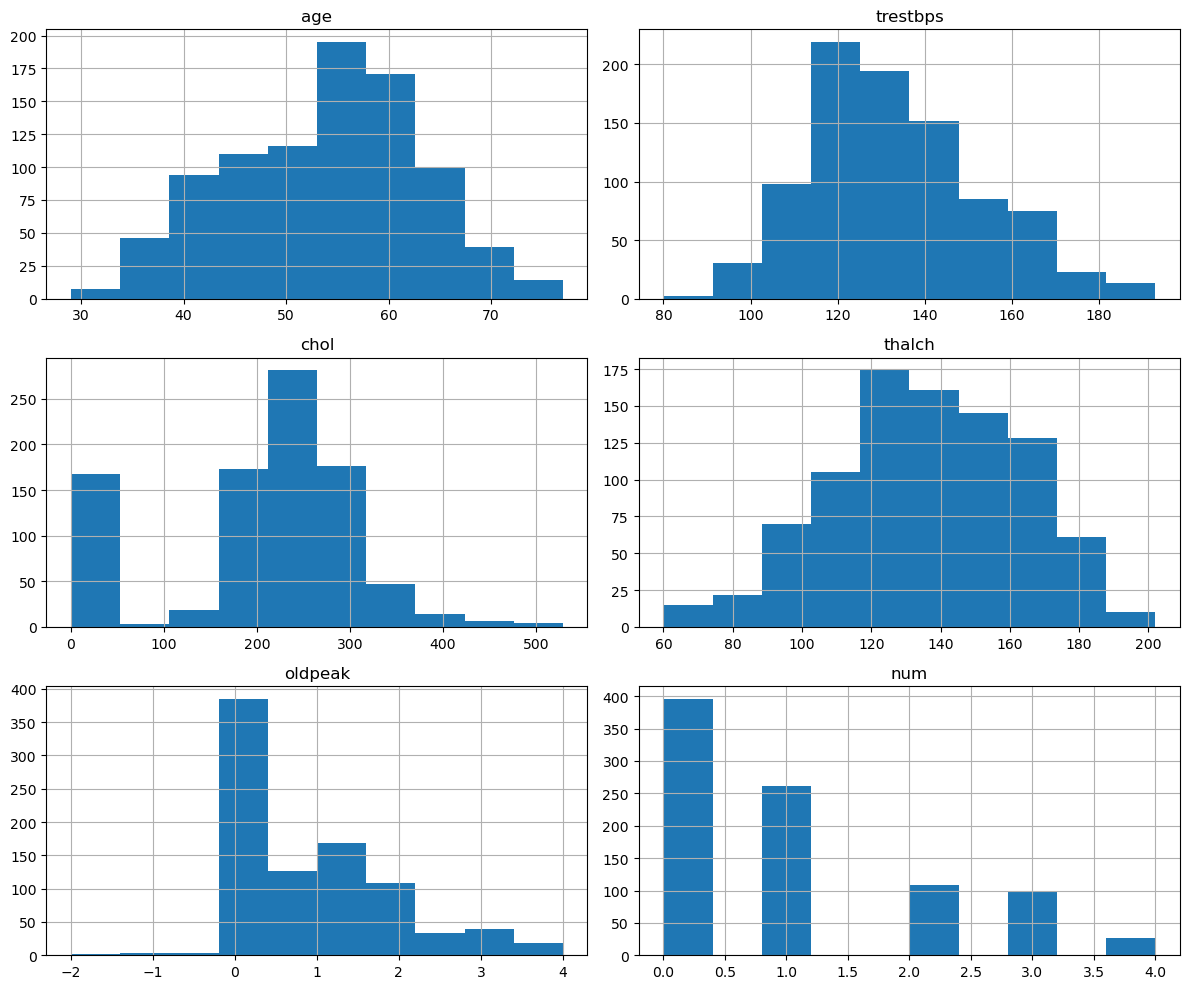

In [13]:
# Visualize Histograms

# Plot histograms for all numerical columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

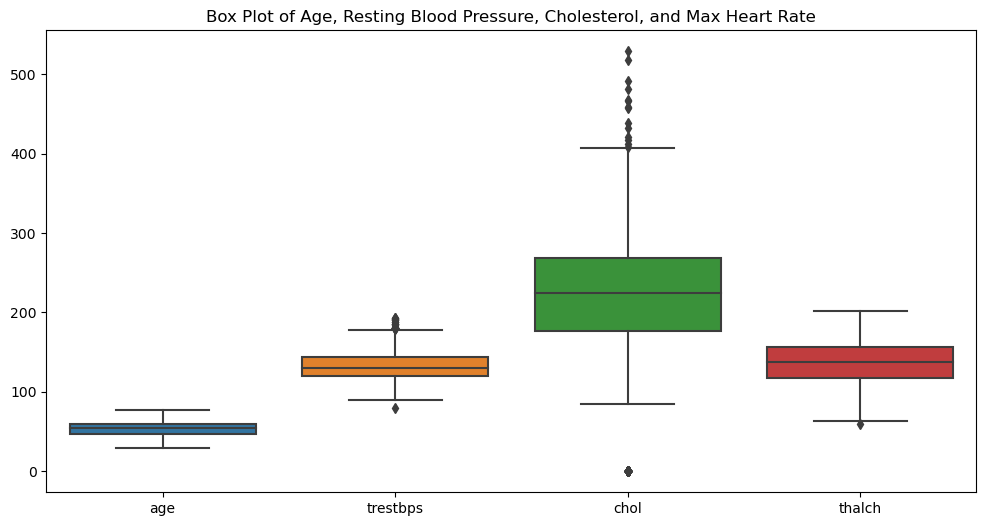

In [14]:
# Visualize Box Plots

# Plot box plots for selected numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalch']])
plt.title('Box Plot of Age, Resting Blood Pressure, Cholesterol, and Max Heart Rate')
plt.show()

# Task 3: Feature Engineering

Q1. If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [15]:
# Identify numerical columns

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

In [16]:
# Identify categorical columns

categorical_cols = df.select_dtypes(include=[object, bool]).columns.tolist()
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [17]:
# Perform one-hot encoding on all categorical columns

df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.300000,0,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
1,41,135,203,132,0.000000,0,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
2,57,140,192,148,0.400000,0,False,True,True,False,...,True,False,True,False,False,True,False,True,False,False
3,52,118,186,190,0.000000,0,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
4,57,110,201,126,1.500000,0,False,True,True,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.500000,4,False,True,True,False,...,True,False,True,False,False,False,True,False,False,True
904,62,166,170,120,3.000000,4,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
905,56,170,0,123,2.500000,4,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
906,56,144,208,105,0.891253,4,False,True,False,False,...,False,True,False,True,True,False,False,True,False,False


In [18]:
# Scale the numerical features

scaler = StandardScaler()
df_encoded[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(df_encoded[['age', 'trestbps',      
                                                                                            'chol', 'thalch', 'oldpeak']])
df_encoded

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.010841,0.618941,0.291196,0.517895,1.442672,0,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
1,-1.385399,0.098631,0.019486,-0.153460,-0.867204,0,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
2,0.357321,0.358786,-0.080141,0.443300,-0.465486,0,False,True,True,False,...,True,False,True,False,False,True,False,True,False,False
3,-0.187279,-0.785896,-0.134483,2.009796,-0.867204,0,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
4,0.357321,-1.202144,0.001372,-0.377245,0.639237,0,False,True,True,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.078359,-0.421679,-1.819083,-0.601030,0.639237,4,False,True,True,False,...,True,False,True,False,False,False,True,False,False,True
904,0.901921,1.711592,-0.279395,-0.601030,2.145678,4,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
905,0.248401,1.919716,-1.819083,-0.489137,1.643531,4,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
906,0.248401,0.566910,0.064771,-1.160493,0.027876,4,False,True,False,False,...,False,True,False,True,True,False,False,True,False,False


In [19]:
# Convert 'num' variable to binary values, threshold = 0
df_encoded['num'] = (df_encoded['num'] > 0).astype(int)
df_encoded

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.010841,0.618941,0.291196,0.517895,1.442672,0,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
1,-1.385399,0.098631,0.019486,-0.153460,-0.867204,0,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
2,0.357321,0.358786,-0.080141,0.443300,-0.465486,0,False,True,True,False,...,True,False,True,False,False,True,False,True,False,False
3,-0.187279,-0.785896,-0.134483,2.009796,-0.867204,0,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
4,0.357321,-1.202144,0.001372,-0.377245,0.639237,0,False,True,True,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.078359,-0.421679,-1.819083,-0.601030,0.639237,1,False,True,True,False,...,True,False,True,False,False,False,True,False,False,True
904,0.901921,1.711592,-0.279395,-0.601030,2.145678,1,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
905,0.248401,1.919716,-1.819083,-0.489137,1.643531,1,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
906,0.248401,0.566910,0.064771,-1.160493,0.027876,1,False,True,False,False,...,False,True,False,True,True,False,False,True,False,False


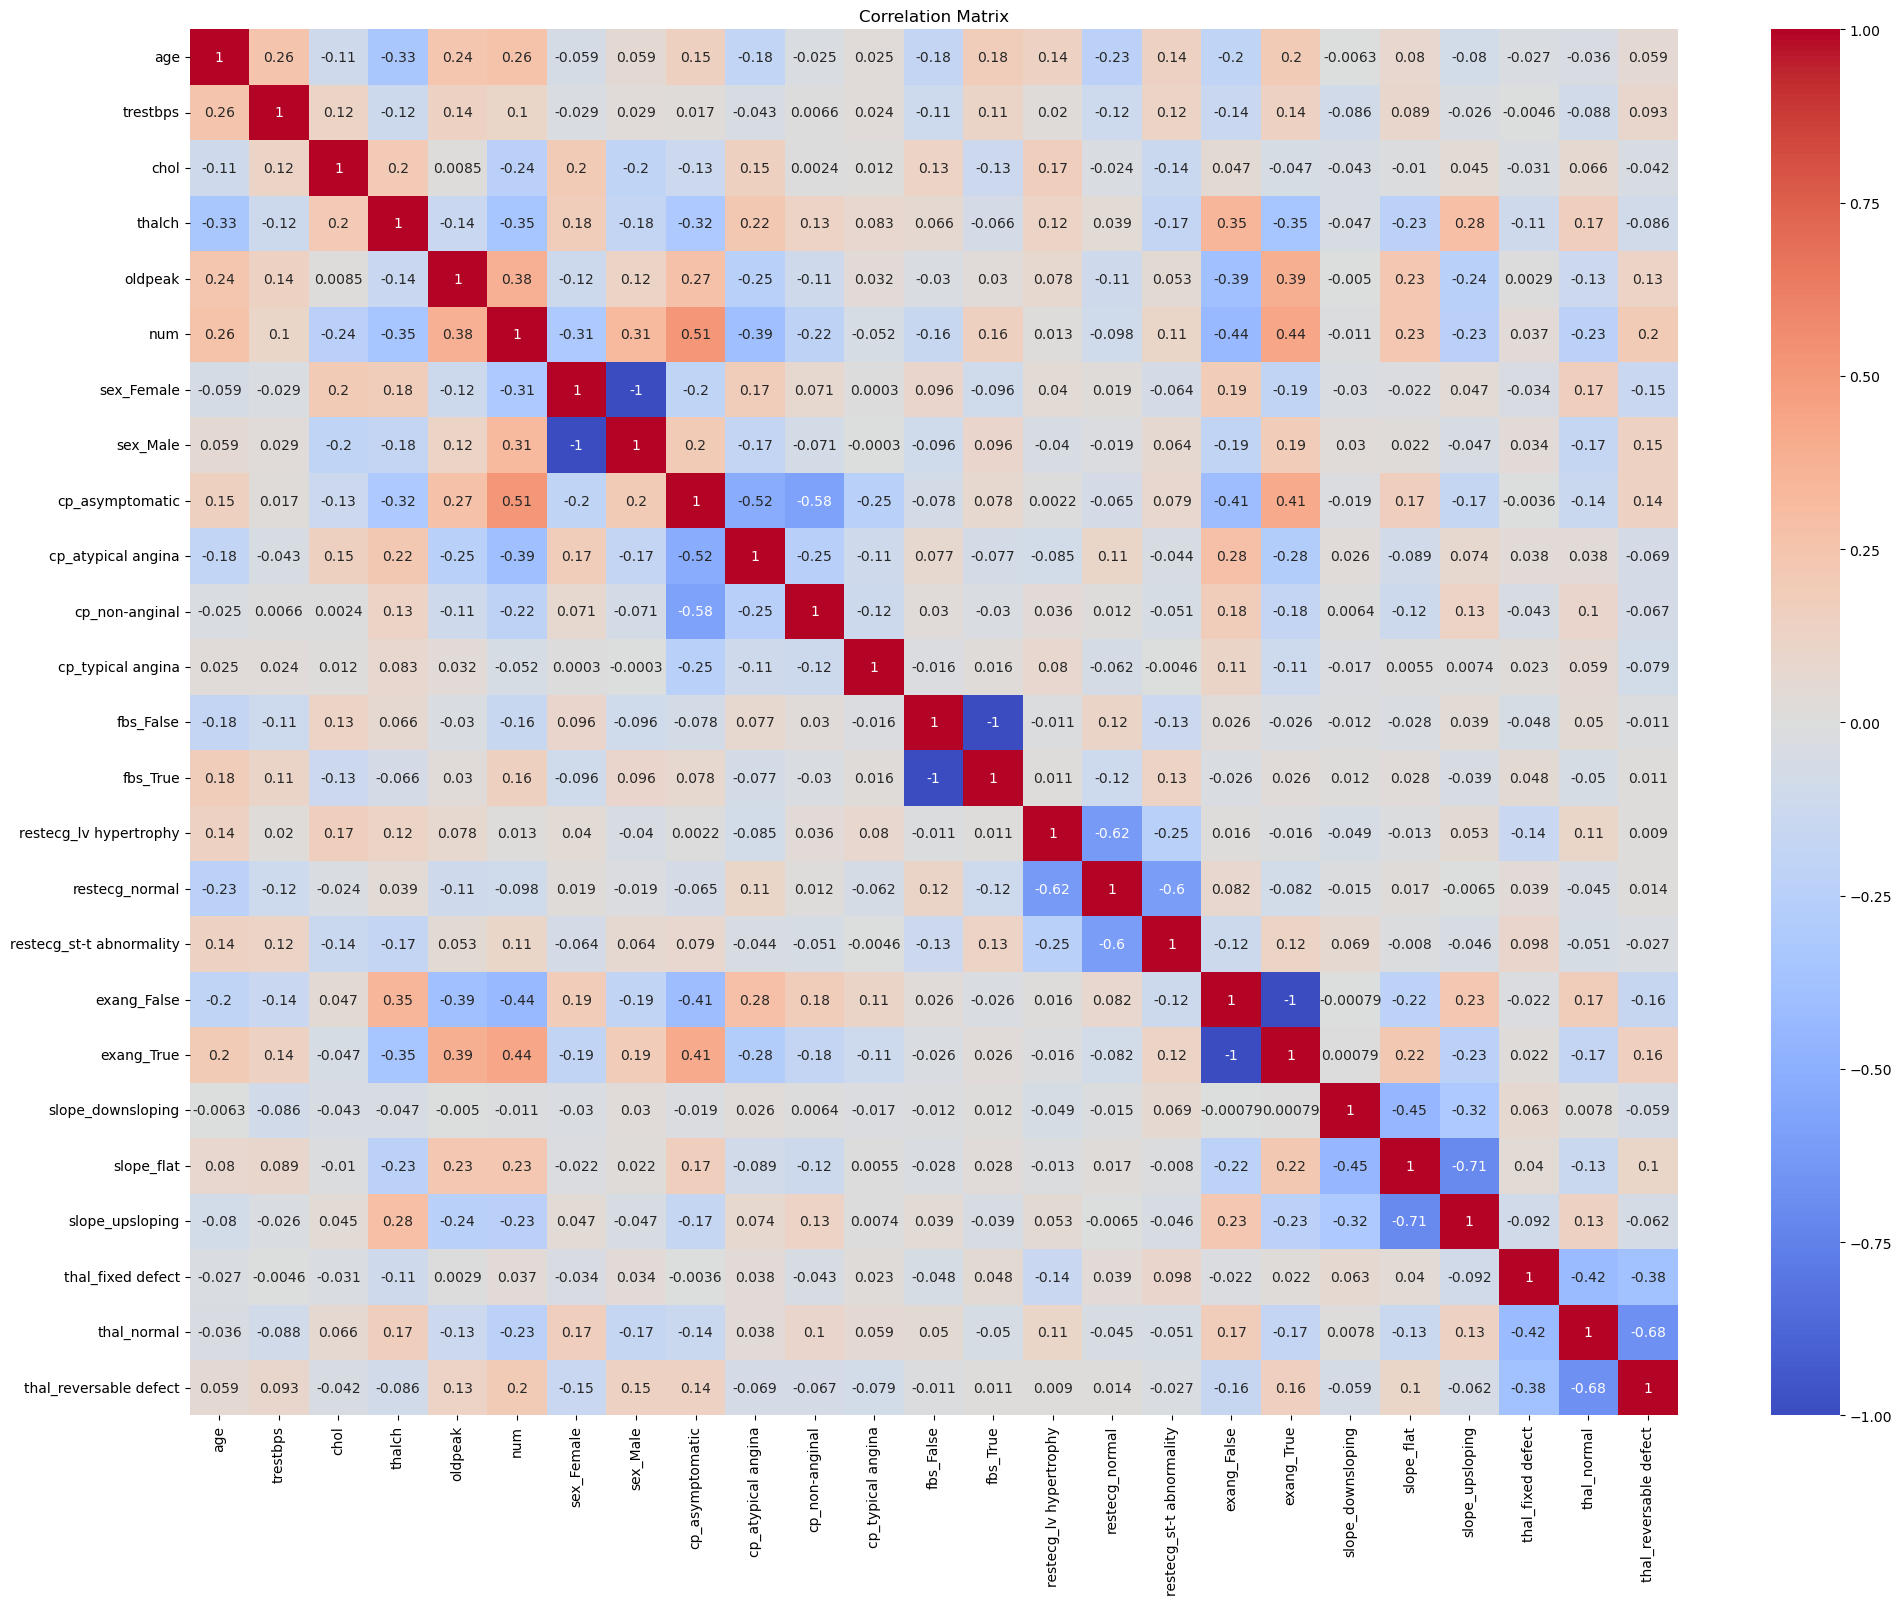

In [20]:
# Visualize Correlation Matrix

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Task 4: Decision Tree Classification

Q1. Split the dataset into training and testing sets (e.g., using an 80-20 split).

Q2. Implement a Decision Tree Classification model using a library like scikit-learn.

Q3. Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

##### Splitting the dataset

In [21]:
# Separate features (X) and target (y)
X = df_encoded.drop('num', axis=1)  # Features
y = df_encoded['num']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 24)
Shape of X_test: (179, 24)
Shape of y_train: (712,)
Shape of y_test: (179,)


##### Implementing a Decision Tree Classification model 

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Make Predictions: Use the trained model to make predictions on the test data.

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Predict probabilities on the test data
y_prob = dt_classifier.predict_proba(X_test)[:, 1]

##### Evaluate the model

In [24]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        84
           1       0.76      0.72      0.74        95

    accuracy                           0.73       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.73      0.73      0.73       179



In [25]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.73


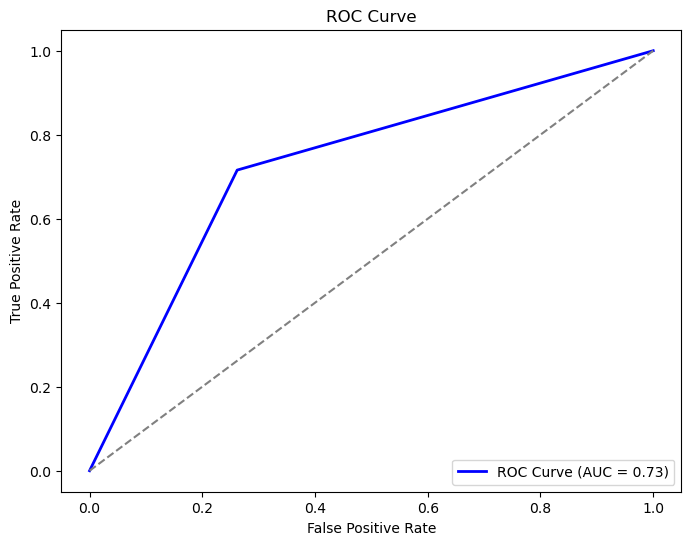

In [26]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Task 5: Hyperparameter Tuning

Q1. Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [27]:
# Define the parameter grid

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [28]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [29]:
# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [30]:
# Print the best parameters and best score
print("Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best CV Score: {grid_search.best_score_:.2f}")

Best Parameters Found:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best CV Score: 0.75


In [31]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [32]:
# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on Test Set: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        84
           1       0.80      0.78      0.79        95

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



# Task 6: Model Evaluation and Analysis

Q1. Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Q2. Visualize the decision tree structure to understand the rules learned by the model and identify important features

#### Hyperparameters and Cross-Validation Results

1. Best Parameters Found:
    1. Criterion: 'gini'
    2. Max Depth: 5
    3. Min Samples Split: 2
2. Best Cross-Validation Score: 0.75
3. Performance on Test Set: Accuracy = 0.78
4. Classification Report
    1. Precision:
        1. Class 0: 0.76
        2. Class 1: 0.80
    2. Recall:
        1. Class 0: 0.77
        2. Class 1: 0.78
    3. F1-score:
        1. Class 0: 0.76
        2. Class 1: 0.79
    3. Support:
        1. Class 0: 84
        2. Class 1: 95
        
##### Interpretation:

1. Accuracy: The model achieves an accuracy of 0.78 on the test set, indicating that it correctly predicts 78% of the instances.
2. Precision and Recall: For both classes (0 and 1), precision and recall are relatively balanced, with class 1 slightly outperforming class 0 in terms of precision (0.80 vs 0.76) and recall (0.78 vs 0.77).
3. F1-score: The F1-score provides a harmonic mean of precision and recall, giving a balanced measure of the model's performance across both classes.

#### Conclusion:

1. The Decision Tree model with the optimized hyperparameters (criterion='gini', max_depth=5, min_samples_split=2) shows reasonably good performance with an accuracy of 0.78 on the test set.
2. The classification report confirms that the model performs well in distinguishing between the two classes (0 and 1), with balanced precision, recall, and F1-scores.
3. Further model refinement could involve exploring additional hyperparameters, feature engineering, or considering ensemble methods to potentially improve performance further.

#### Decision Tree Structure

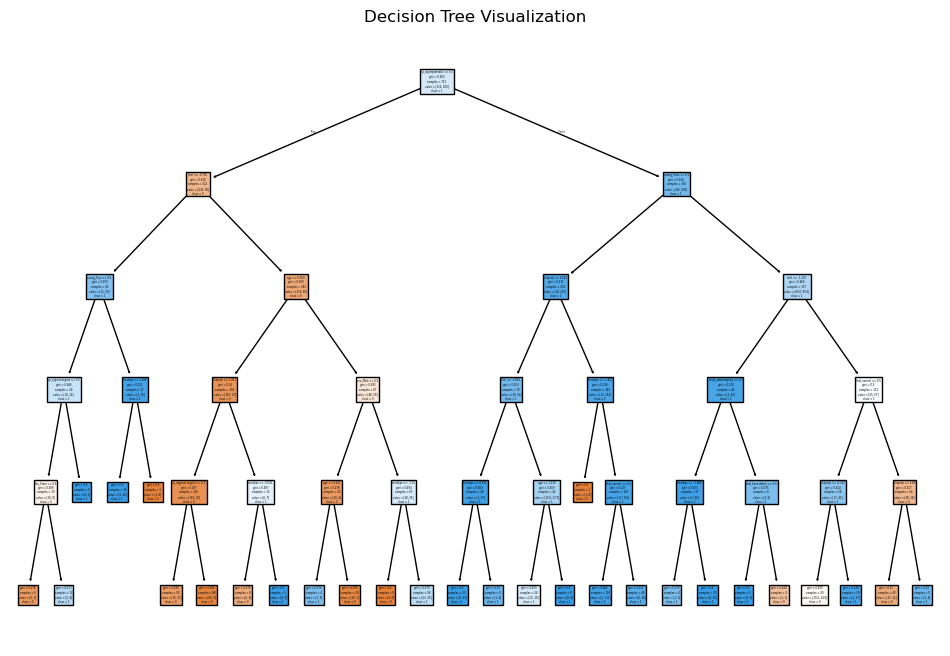

In [33]:
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'])
plt.title("Decision Tree Visualization")
plt.show()